# Tarea Semanal 6

## Ejercicio 1

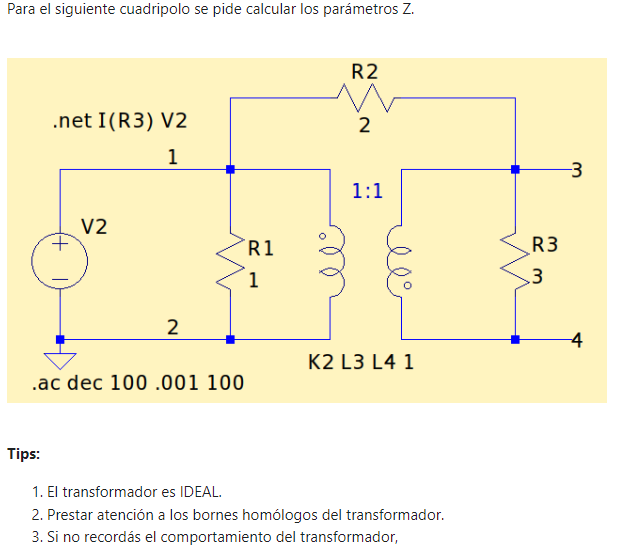

### Cálculos

In [1]:
from IPython.display import IFrame

IFrame(src='TS6_1.pdf', width=1000, height=1000)

### Simulación con transformador ideal

#### Circuito Interno del transformador
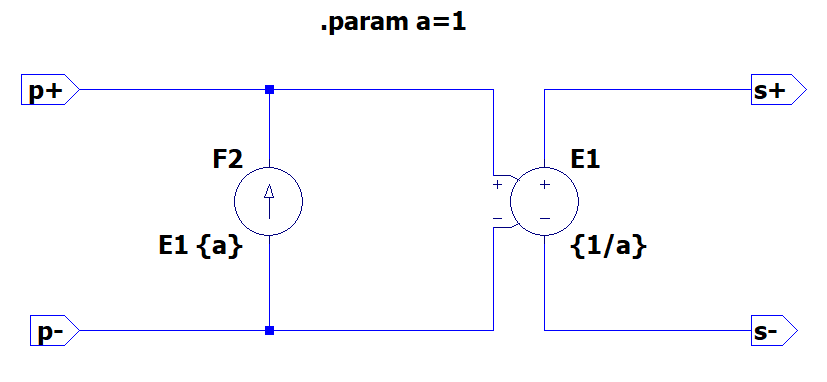
#### Simulación
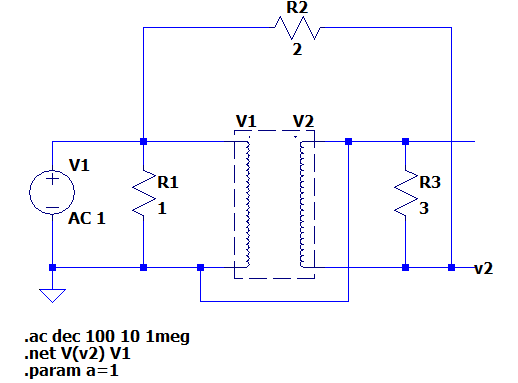
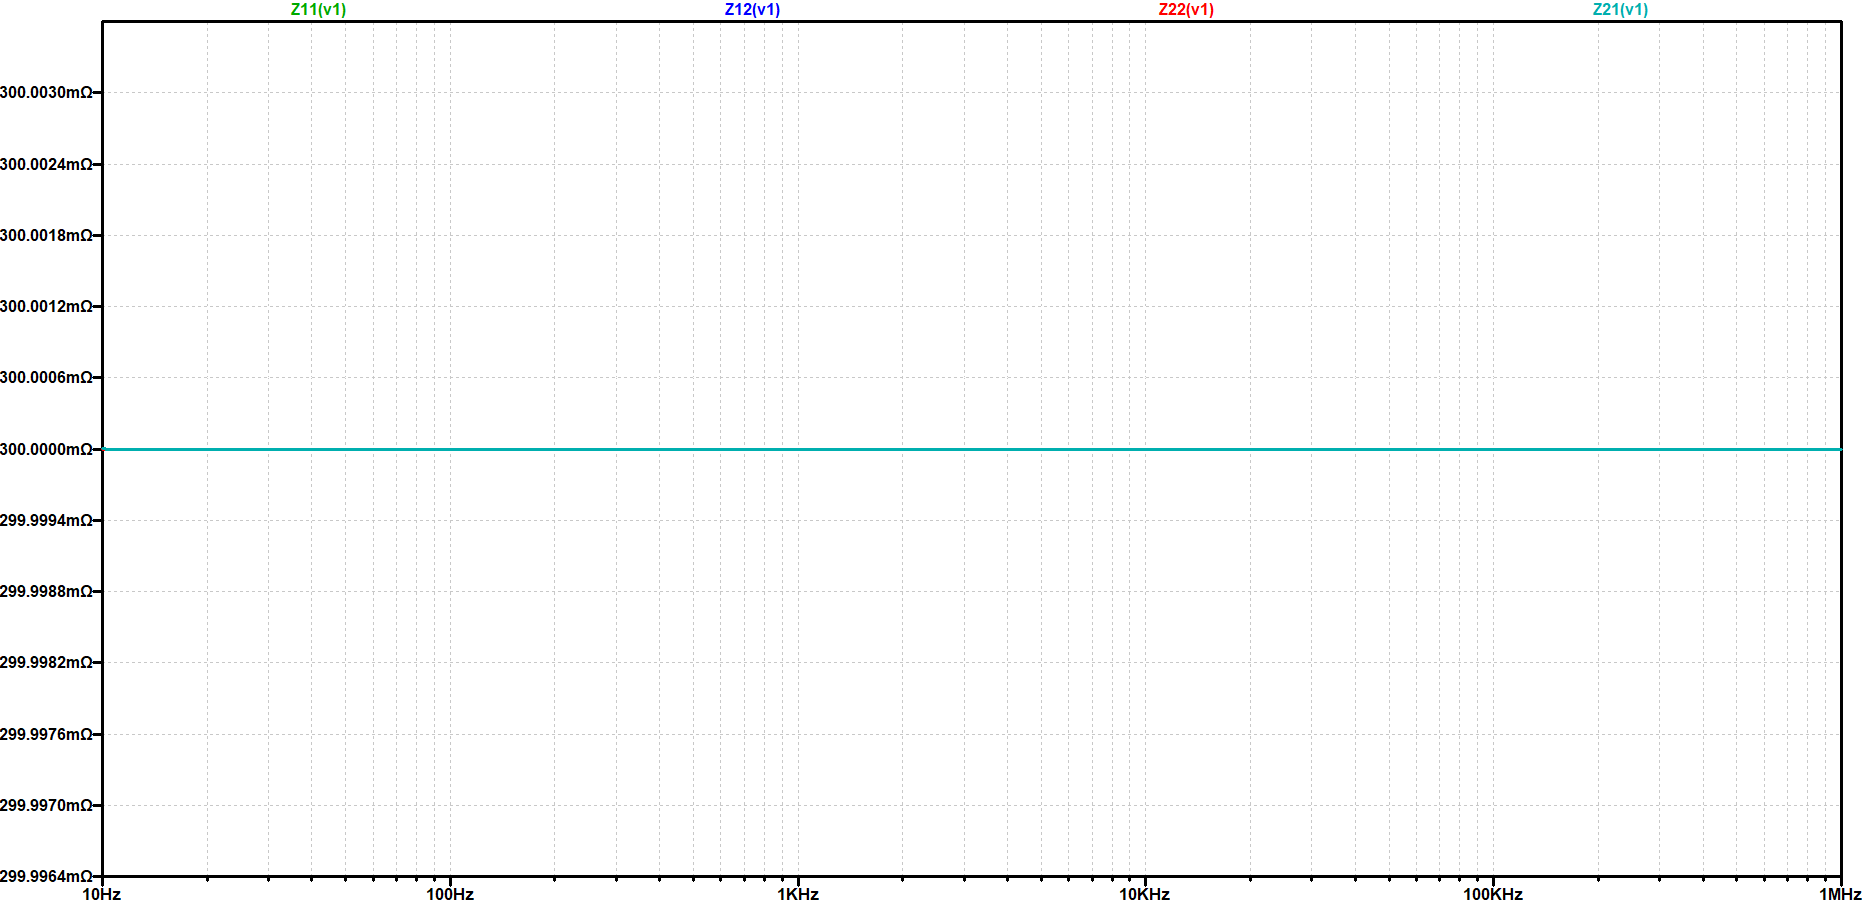
<b>NOTA:</b> los parámetros Z12 y Z21 son negativos. Esto podemos apreciarlo en el gráfico de fase que no lo puse para no estorbar

### Conclusiones
- Como se puede observar la simulación coincide con los cálculos.

- Me fue muy útil simular los cuadripolos intermedios de los cálculos para saber en qué pasos me equivoqué. Por ejemplo:

    - Al quitar R2 y simular los parámetros Z estaría simulando al bloque "Teq" que incluye R1, el transformador y R2. 

    - También verifiqué que esto sea equivalente a la red T formada por los resistores de 3/2, -3/4 y 3/2 que figuran en los cálculos.

- Es muy importante conectar correctamente los generadores controlados ya que estos definirán el sentido de los bornes homólogos

## Ejercicio 2
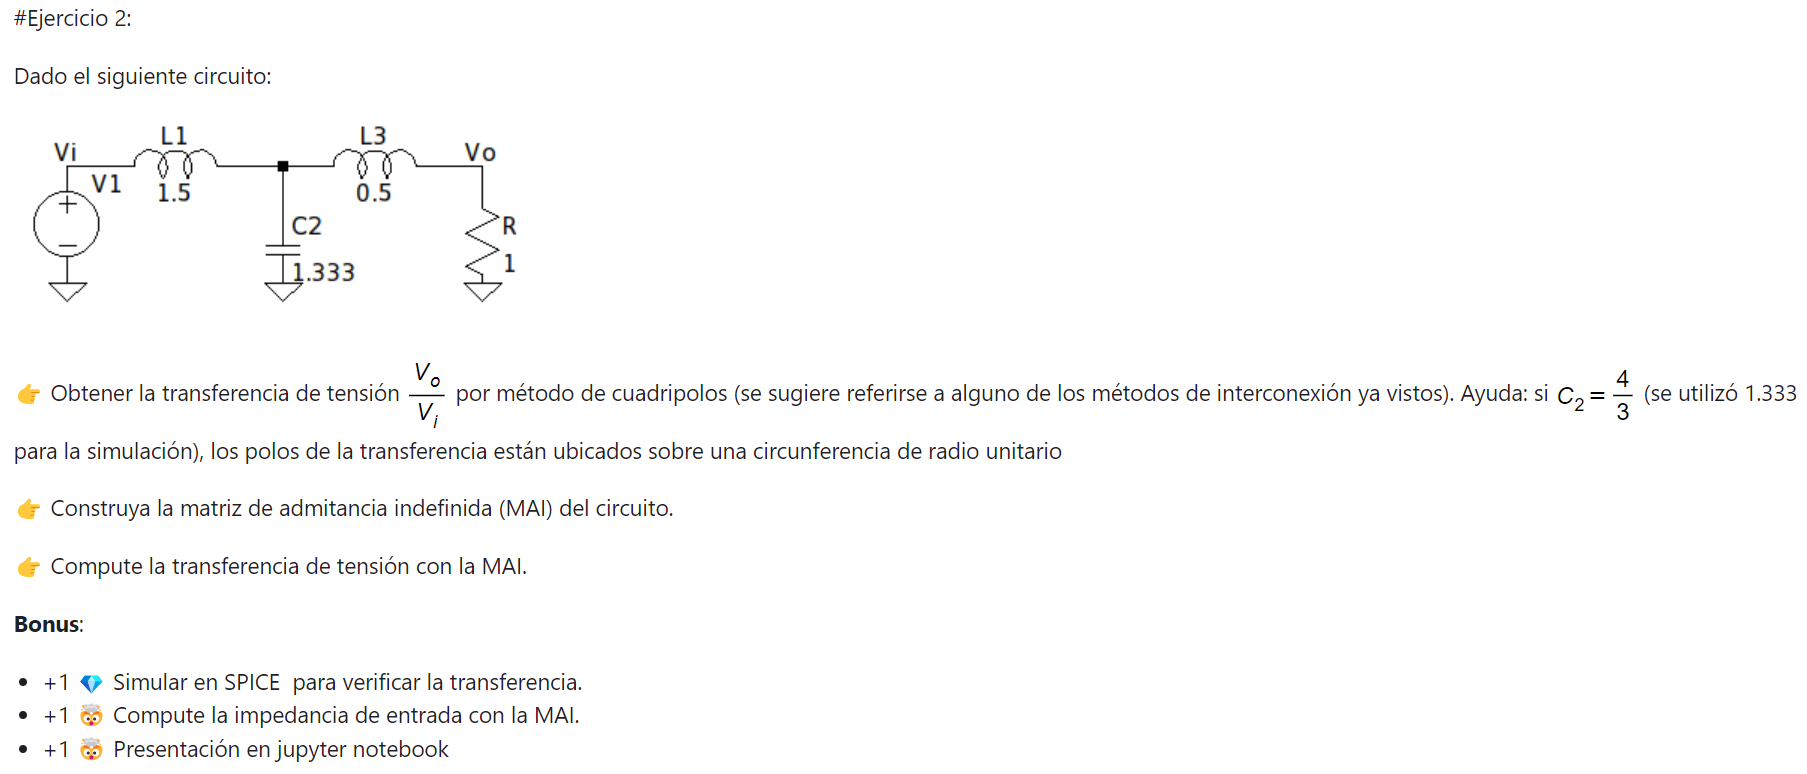

### Cálculos

In [2]:
IFrame(src='TS6_2.pdf', width=1000, height=1000)

### Simulaciones
#### Simulación Numérica

In [3]:
import sympy as sp

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex

Y1, Y2, Y3 = sp.symbols('Y1 Y2 Y3', complex=True) #YL1, YC2, YL3
G = sp.symbols('G', real=True, positive=True)

# Armo la MAI
#               Nodos: 1      2         3       4
Ymai = sp.Matrix([  
                    [ Y1,    -Y1,       0,      0],
                    [ -Y1,   Y1+Y2+Y3,  -Y3,    -Y2],
                    [ 0,     -Y3,       Y3+G,   -G],
                    [ 0,     -Y2,       -G,     Y2+G ]
                 ])

# con_detalles = False
con_detalles = True

# Calculo la Z en el puerto de entrada a partir de la MAI
print('Impedancia de entrada:')
Zmai = calc_MAI_impedance_ij(Ymai, 3, 0, verbose=con_detalles)

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 2, 3, 3, 0, verbose=con_detalles)

Impedancia de entrada:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Simulación Eléctrica
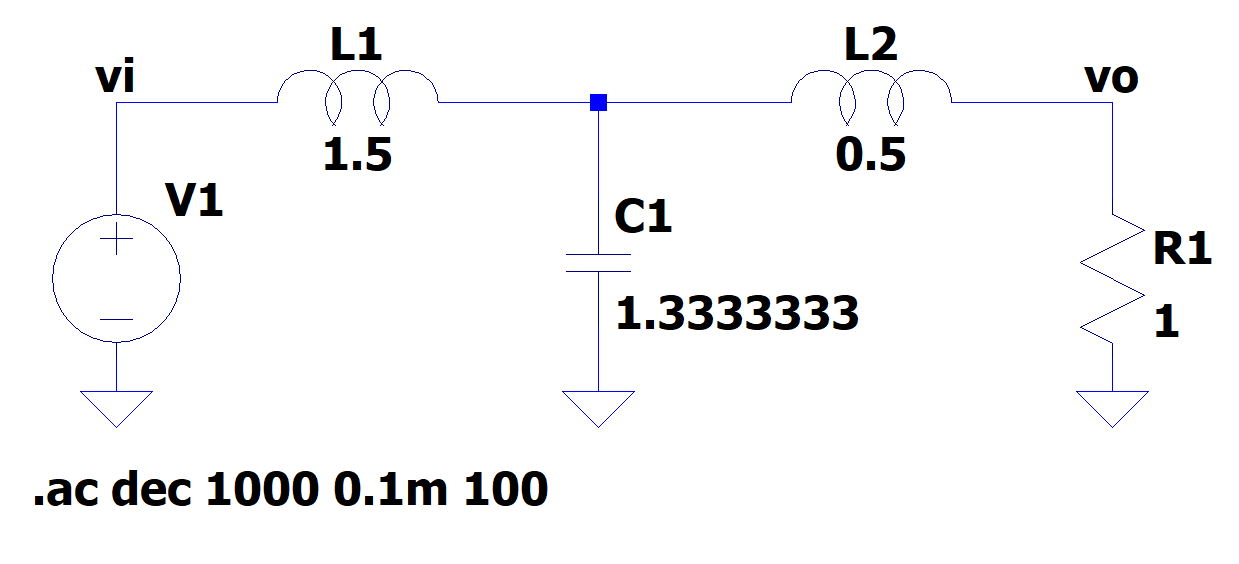
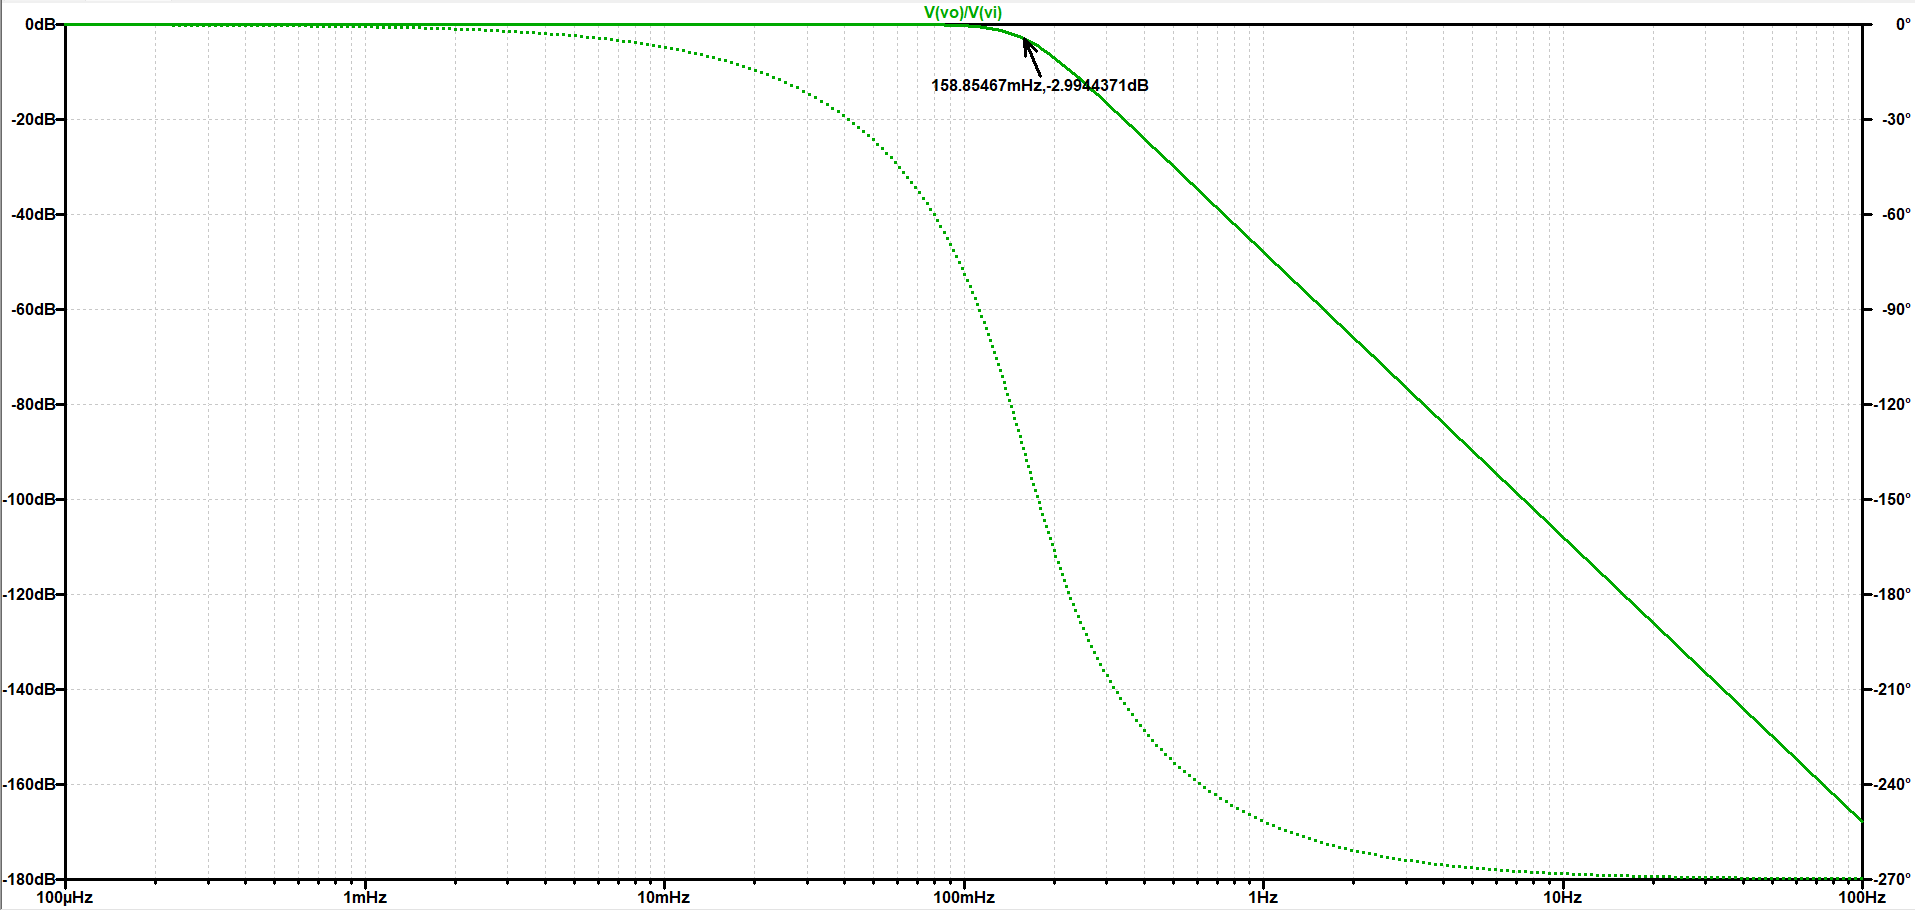


#### Conclusiones
Conclusiones

Computando la mai se obtiene rápidamente una matriz de la cual podemos obtener todas las transferencias de tensión entre puertos, impedancia de un puerto e inclusive transimpedancias, todo procesando la misma matriz.

Creo que me restaría por aprender a utilizar mejor las herramientas de simulación en Python.

Me faltaría encontrar la manera de que me devuelva la expresión calculada en funsión de la variable compleja "S" en lugar de las admitancias genéricas Y1, Y2, Y3, G.

De esta manera podría contrastar los gráficos de LTSpice con las expresiones analíticas de Sympy